# **Exportações**

## Exportações - 2013

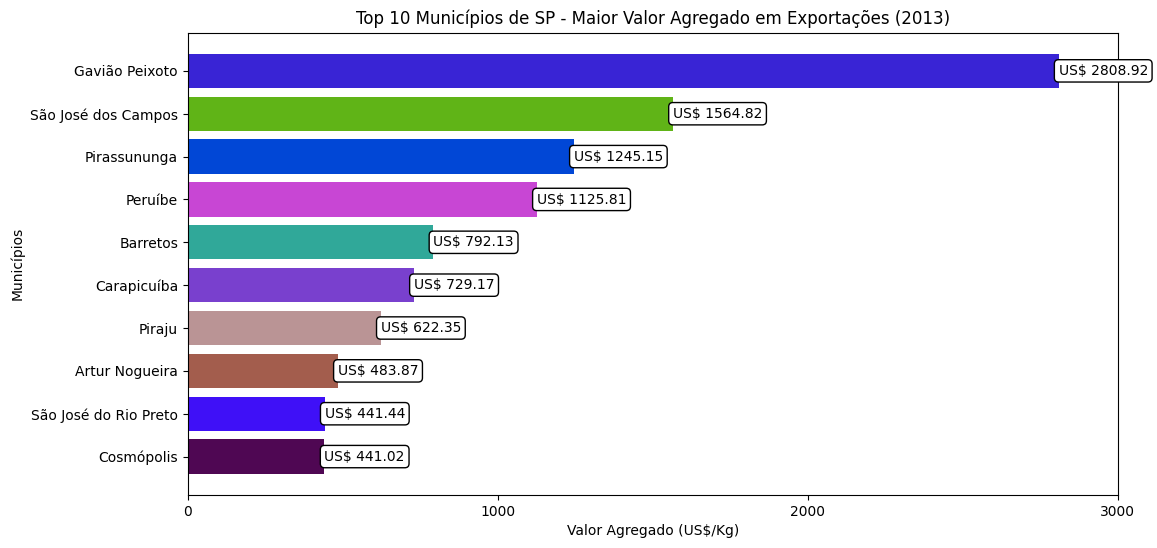

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2013 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2013_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2013, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2013)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2013.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2014

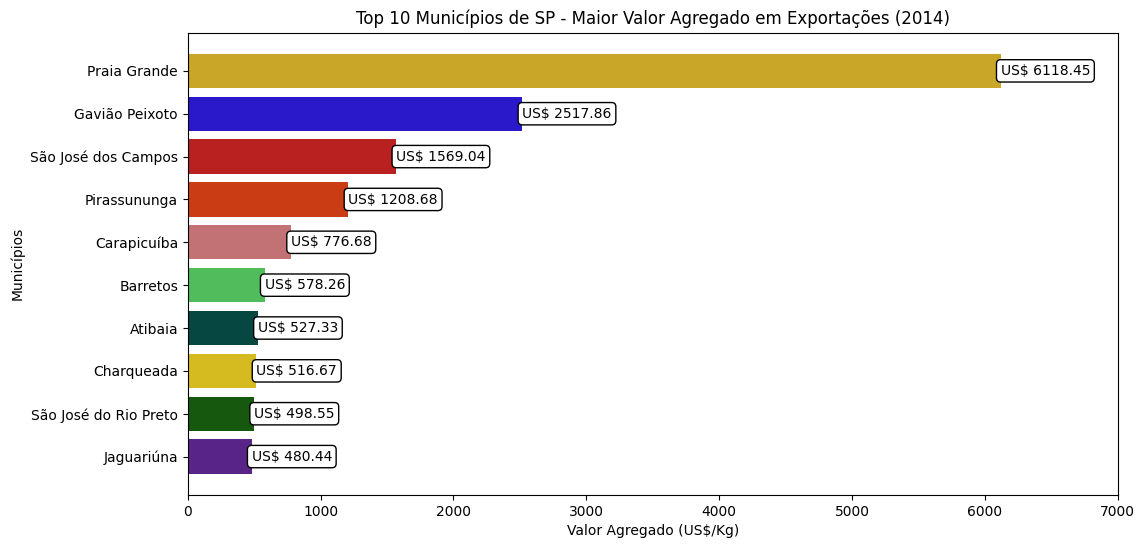

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2014 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2014_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2014, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2014)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2014.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2015

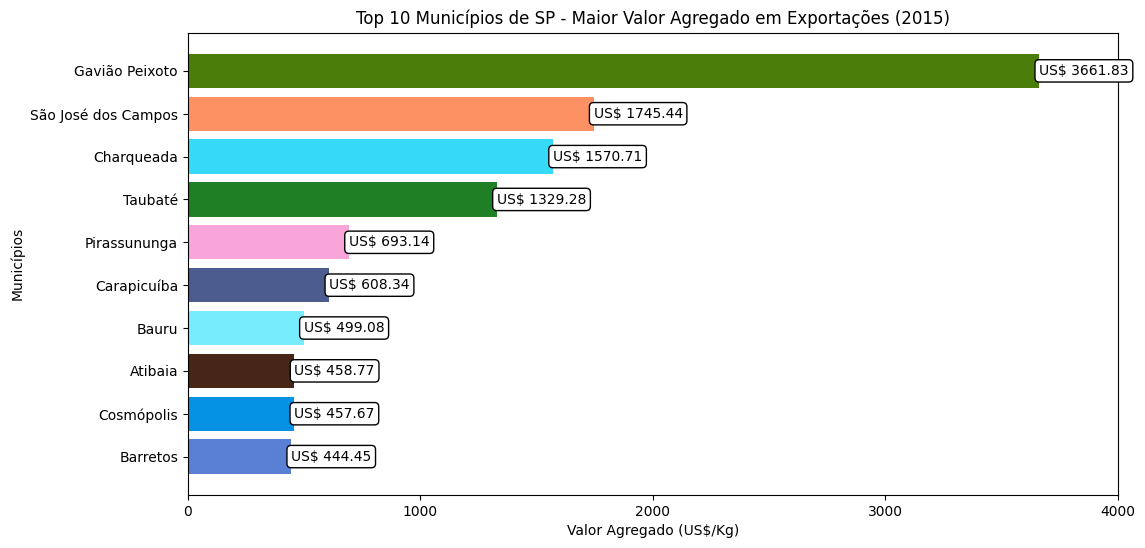

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2015 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2015_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2015, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2015)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2015.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2016

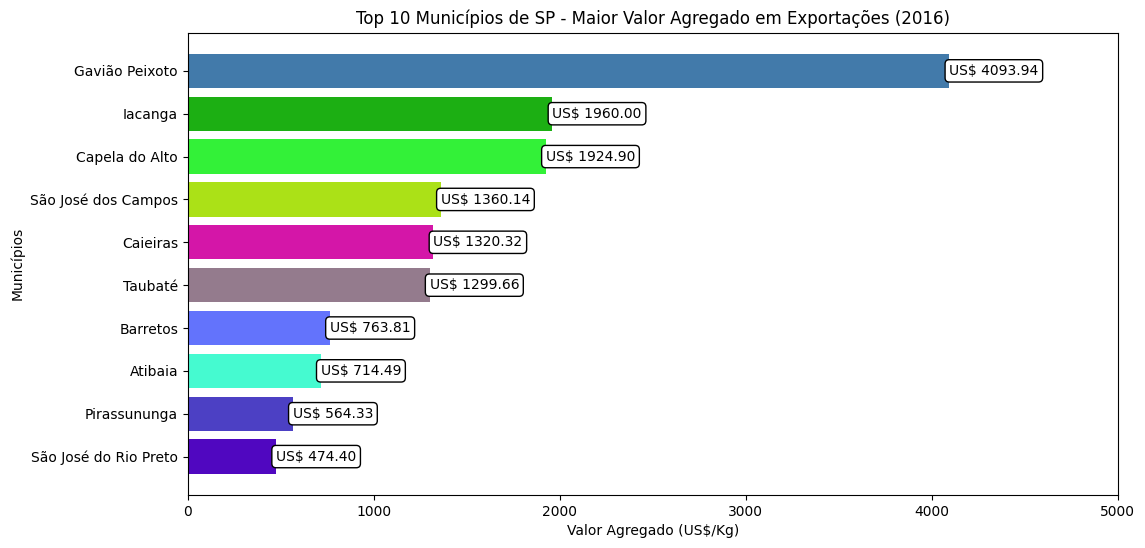

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2016 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2016_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2016, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2016)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2016.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2017

<ipython-input-5-295cdc966964>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]


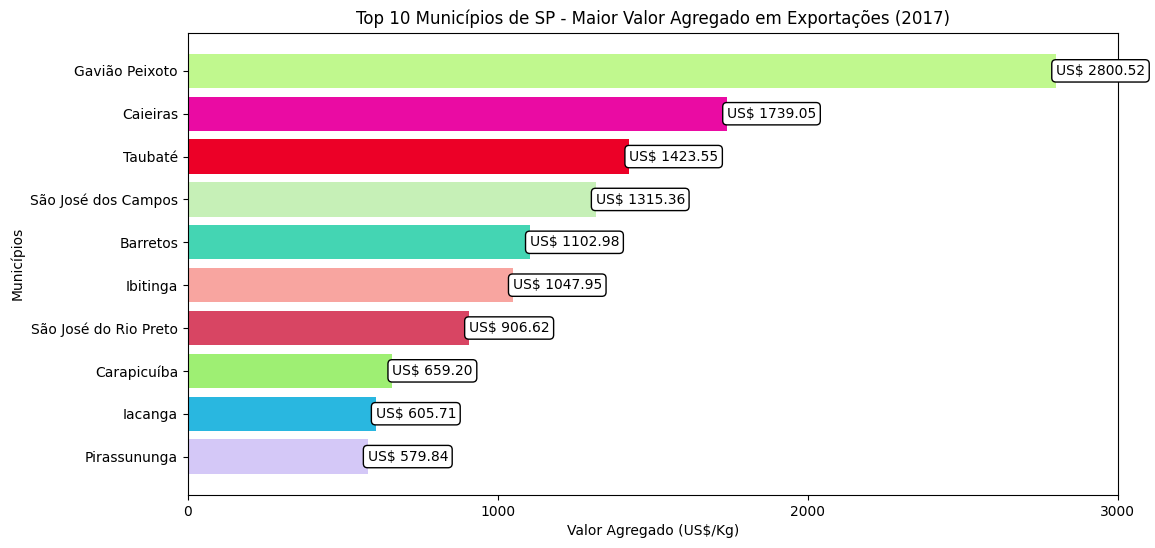

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2017 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2017_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2017, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2017)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2017.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2018

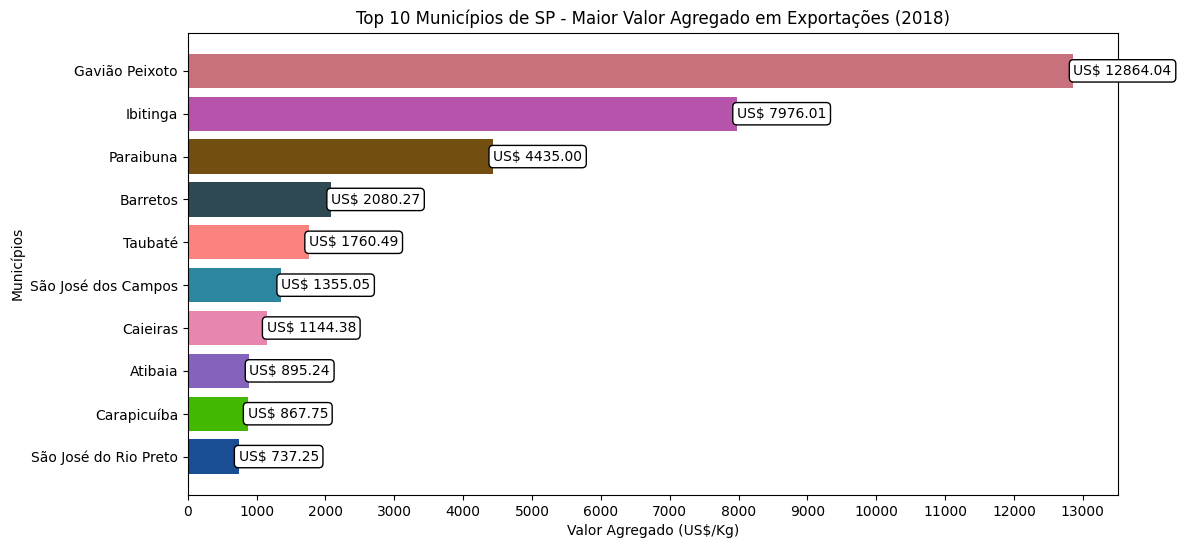

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2018 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2018_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2018, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2018)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2018.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2019

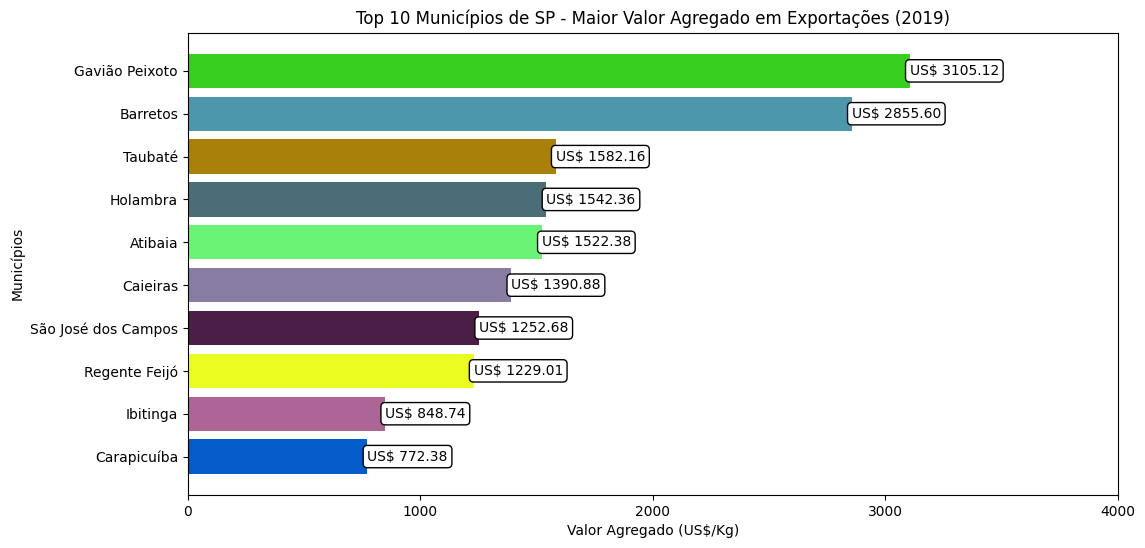

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2019 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2019_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2019, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2019)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2019.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2020

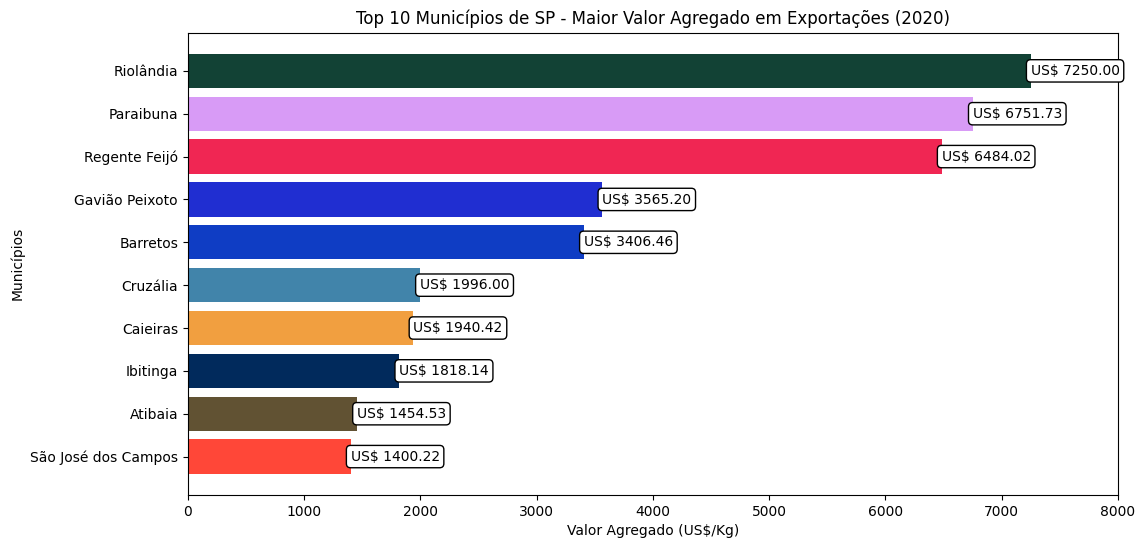

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2020 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2020_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2020, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2020)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2020.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2021

<ipython-input-9-7b1b20b9f343>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]


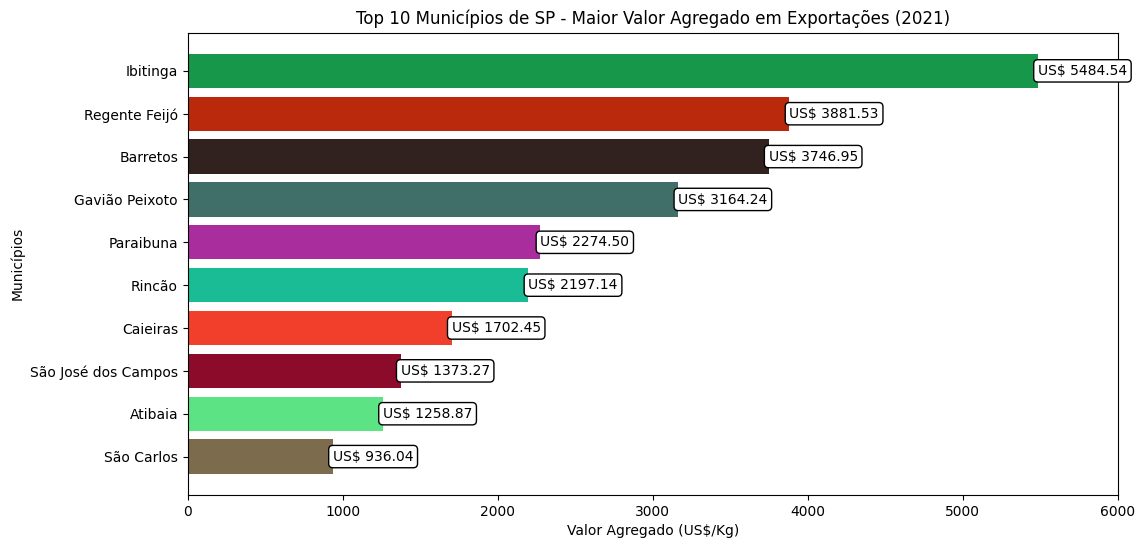

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2021 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2021_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2021, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2021)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2021.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2022

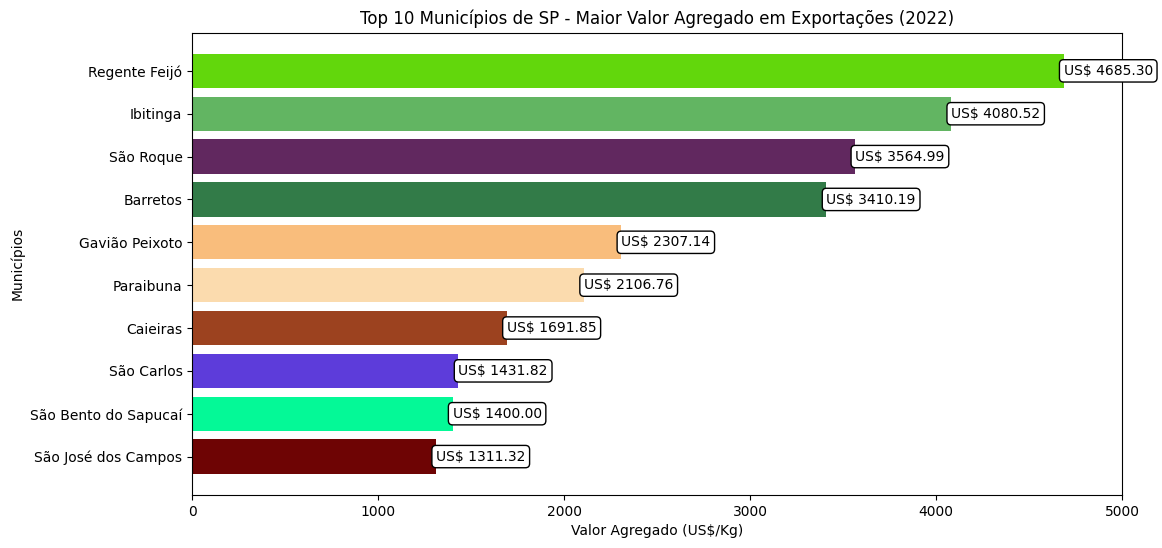

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2022 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2022_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2022, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2022)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2022.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2023

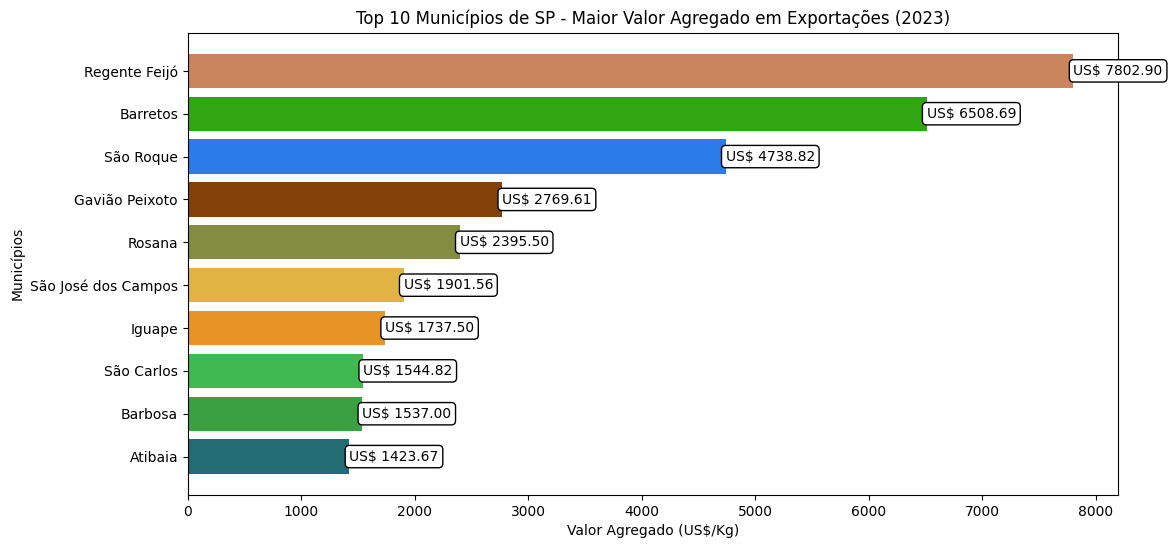

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2023 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2023_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2023, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2023)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2023.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Exportações - 2024

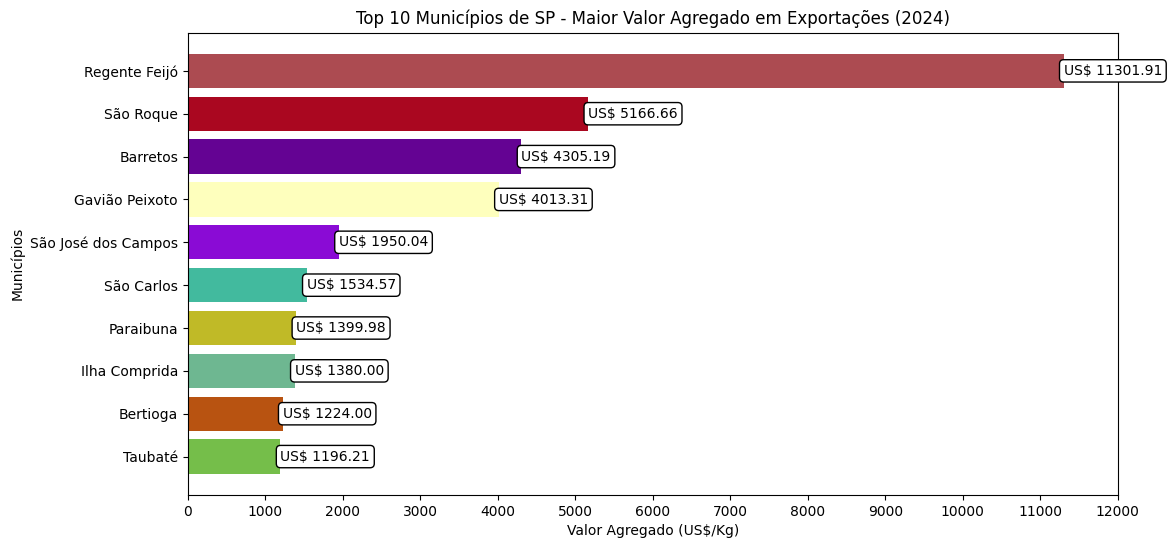

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
exportacoes2024 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2024_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2024, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Exportações (2024)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2024.jpg", format="jpg", dpi=300, bbox_inches="tight")

# **Importações**

## Importações - 2013

<ipython-input-13-af42da0703bd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]


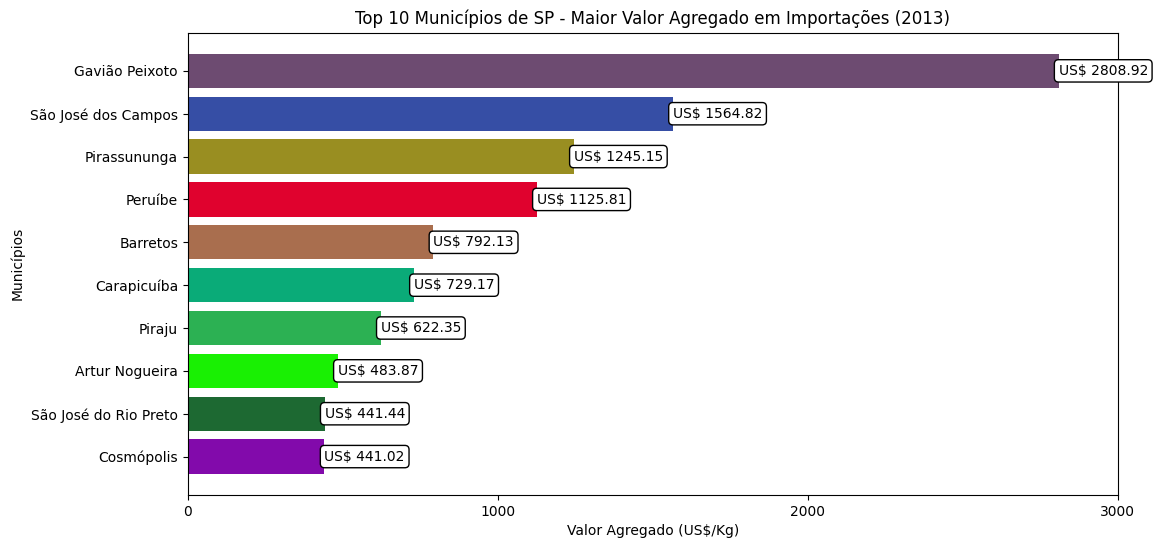

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2013 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2013_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2013, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2013)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2013.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2014

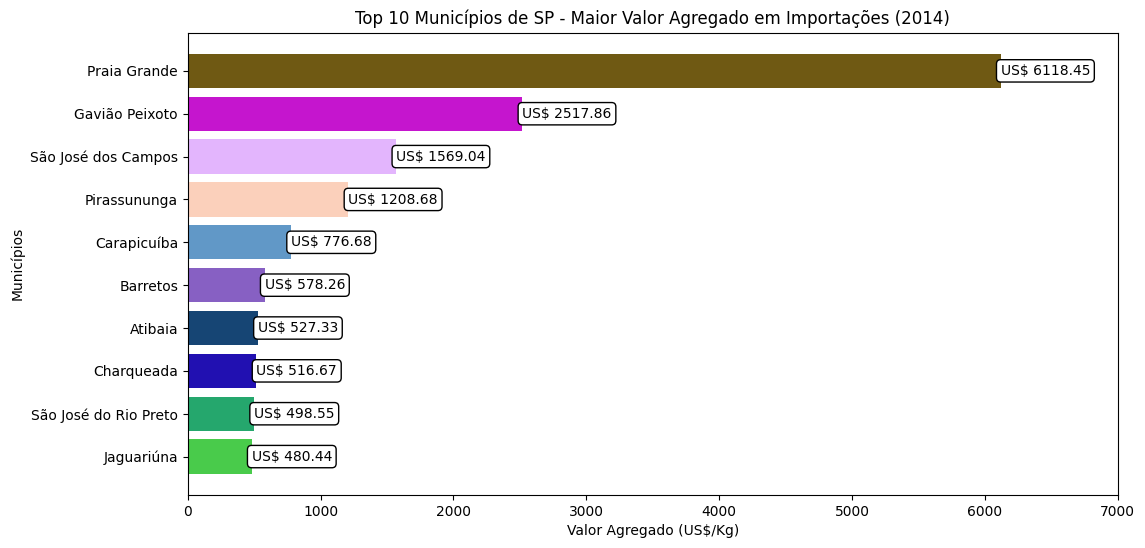

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2014 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2014_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2014, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2014)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2014.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2015

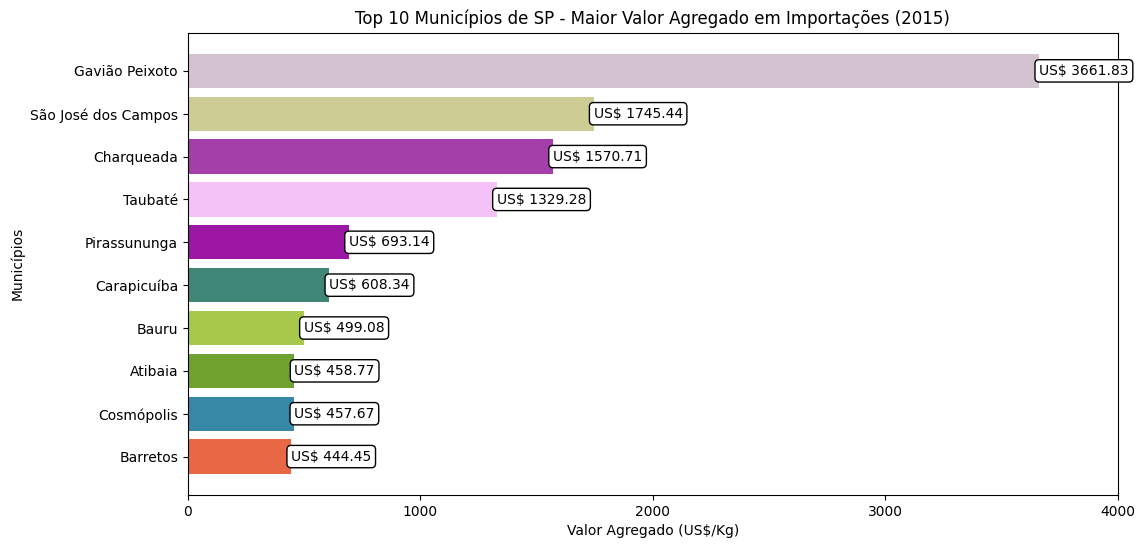

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2015 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2015_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2015, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2015)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2015.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2016

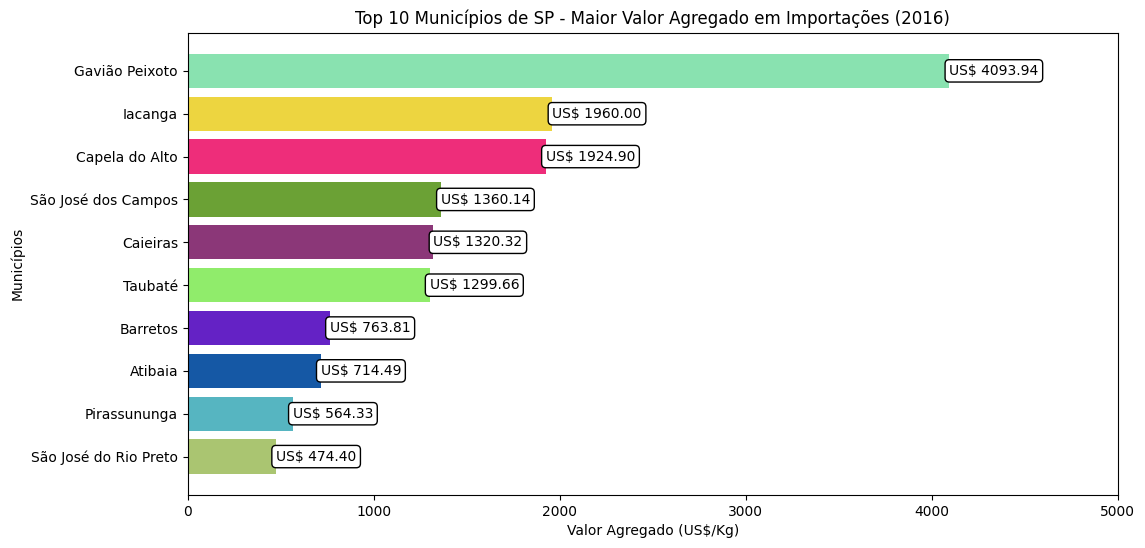

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2016 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2016_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2016, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2016)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2016.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2017

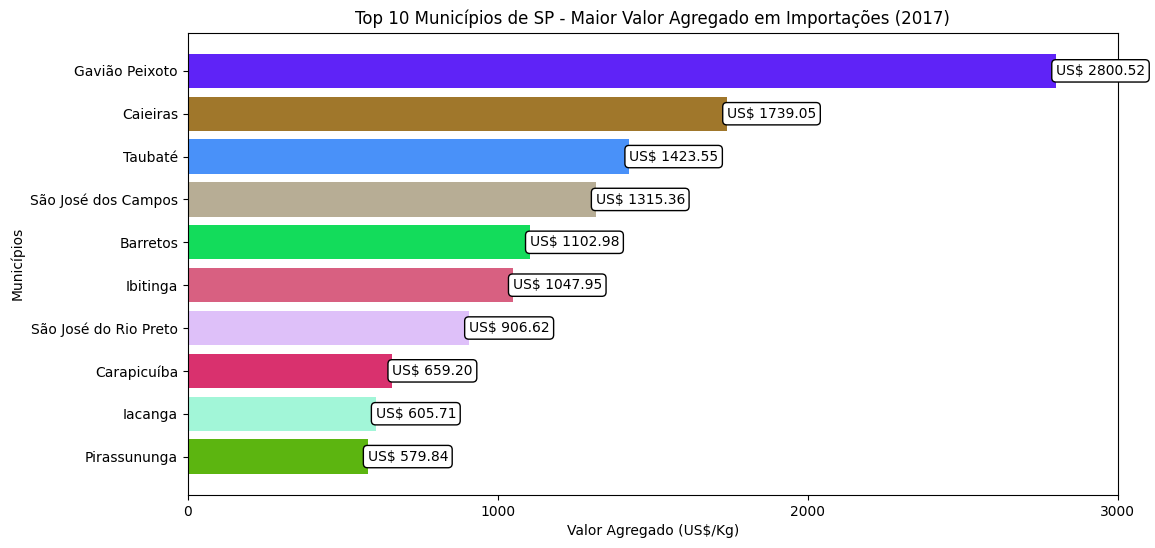

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2017 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2017_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2017, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2017)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2017.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2018

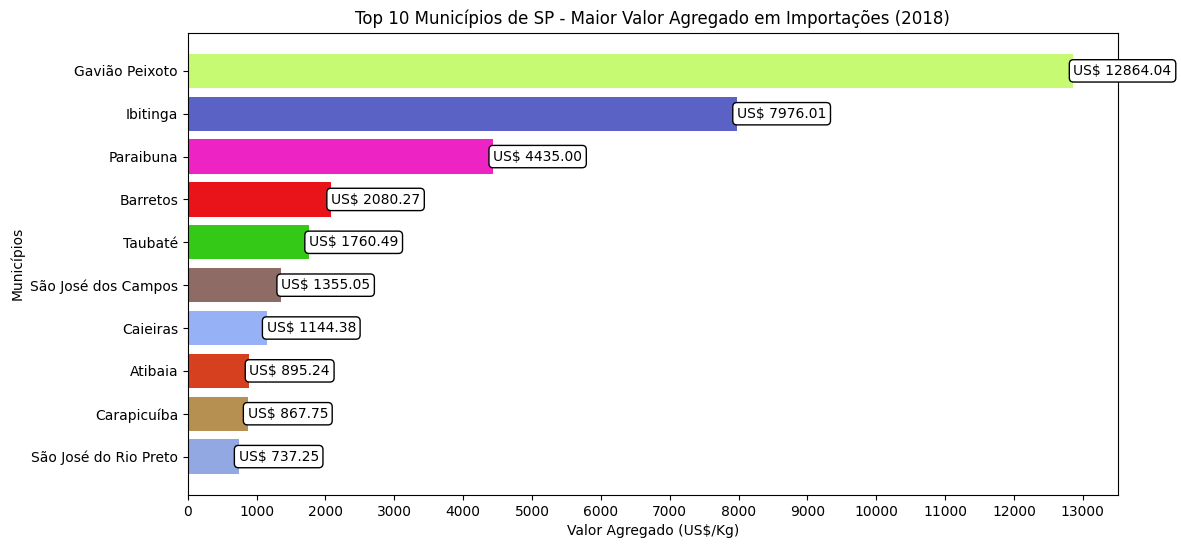

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2018 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2018_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2018, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2018)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2018.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2019

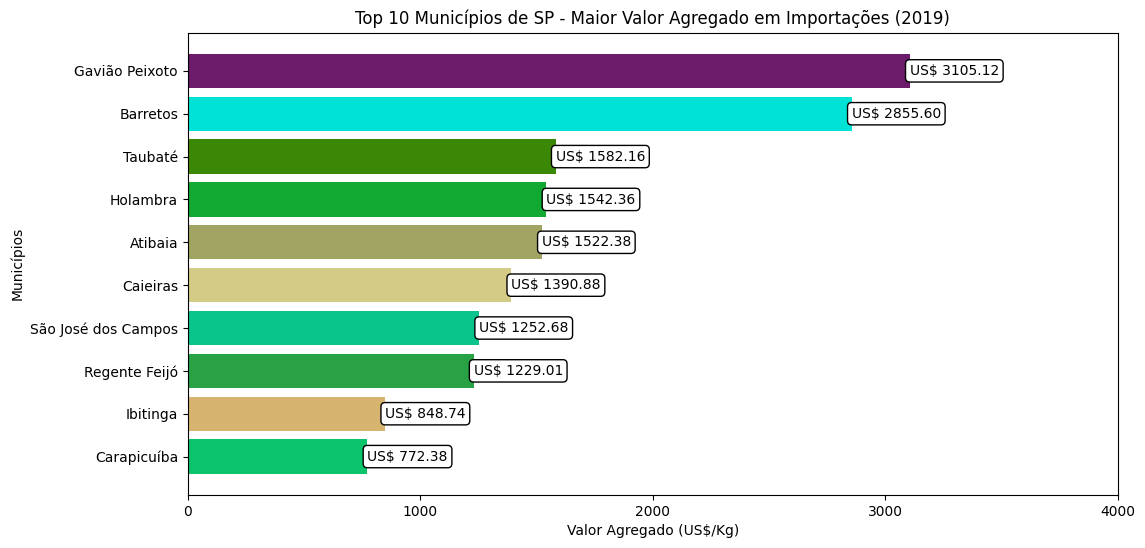

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2019 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2019_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2019, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2019)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2019.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2020

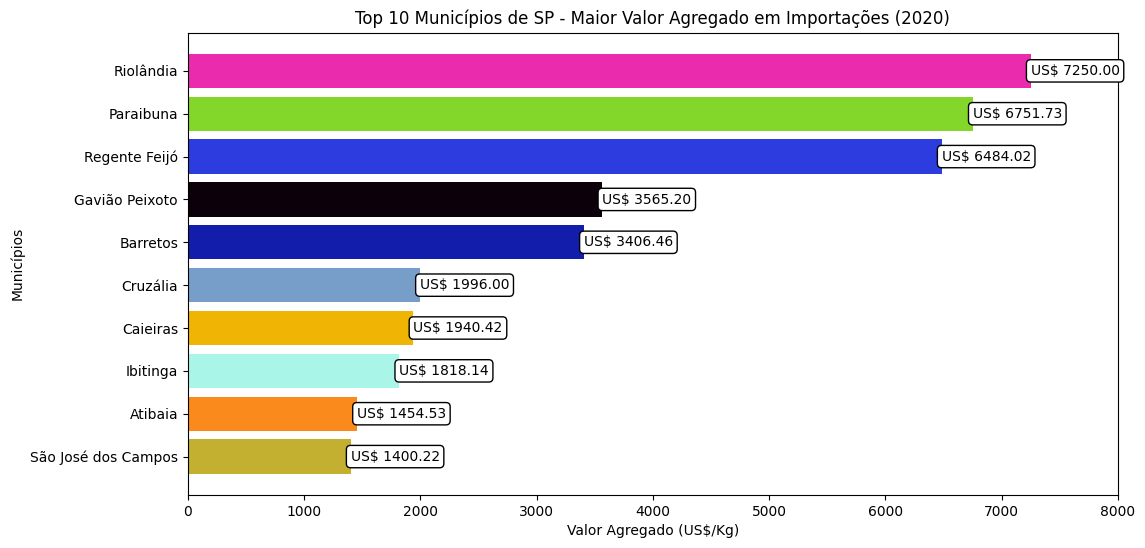

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2020 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2020_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2020, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2020)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2020.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2021

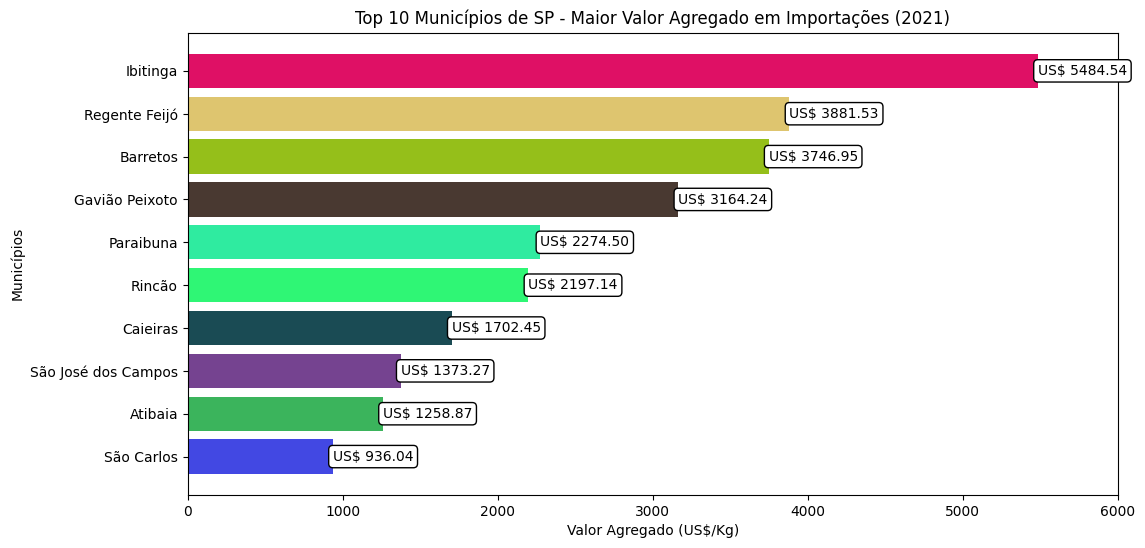

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2021 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2021_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2021, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2021)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2021.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2022

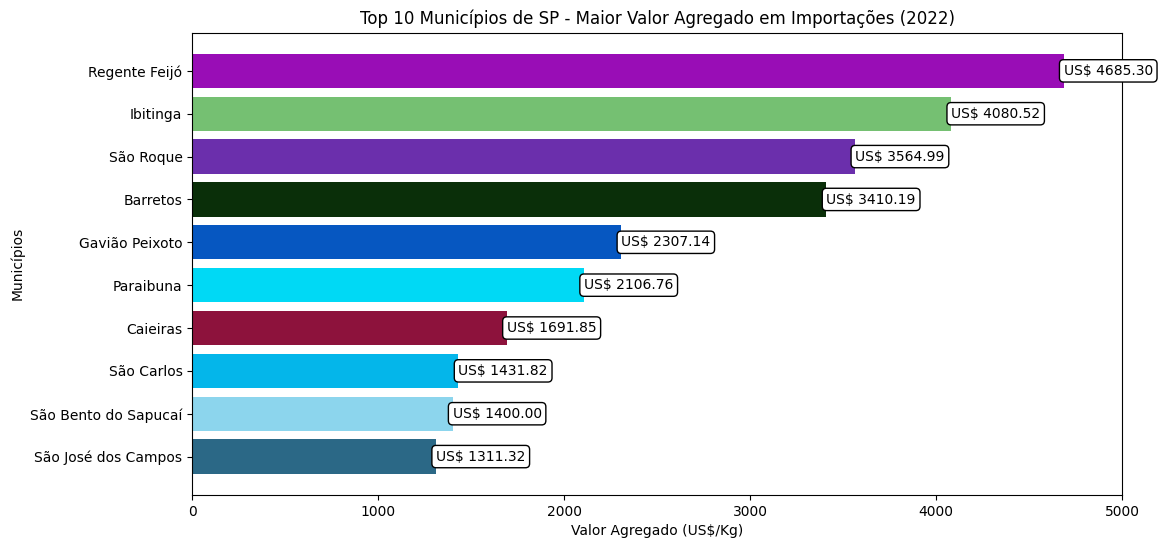

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2022 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2022_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2022, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2022)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2022.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2023

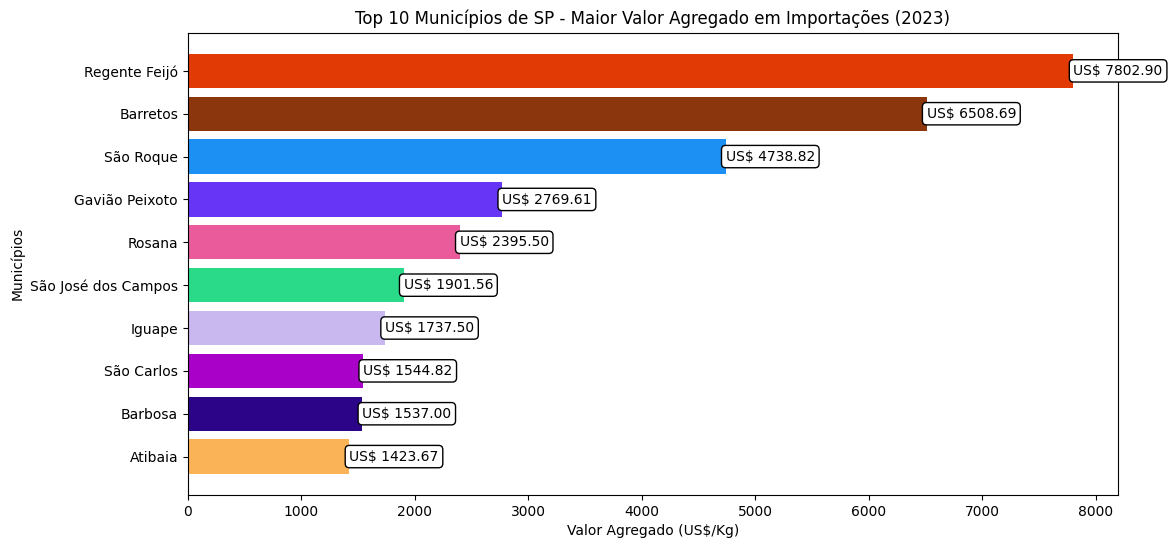

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2023 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2023_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2023, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2023)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2023.jpg", format="jpg", dpi=300, bbox_inches="tight")

## Importações - 2024

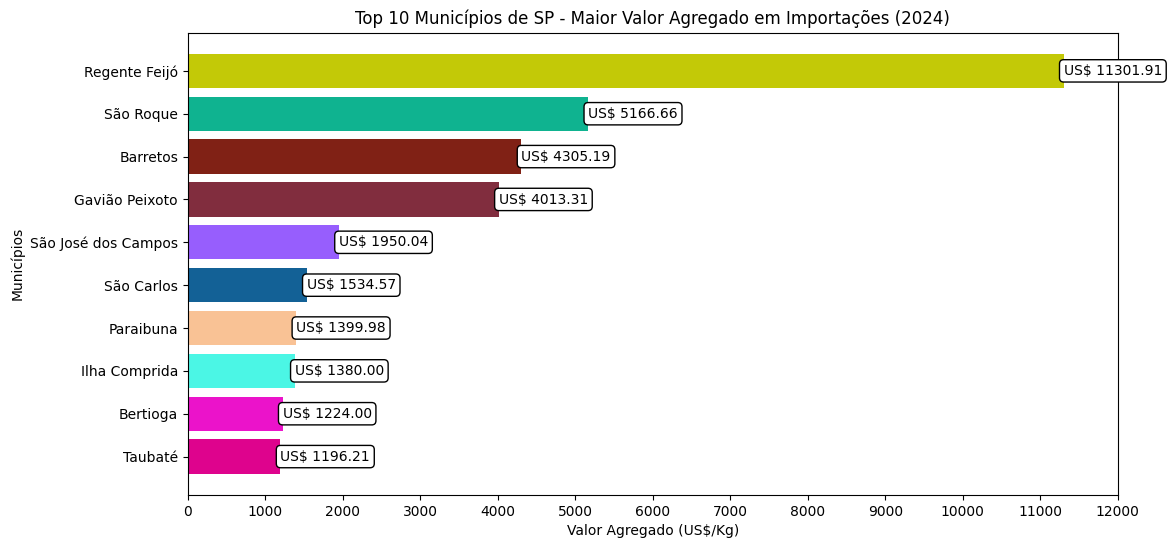

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Carregar os arquivos CSV
importacoes2024 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2024_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(exportacoes2024, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Calcular valor agregado (VL_FOB / KG_LIQUIDO)
df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

# Agrupar por município e calcular a média do valor agregado
municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor agregado
municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(municipios_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajustar o eixo X para aparecer de 1000 em 1000
plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

# Adicionar rótulos e título
plt.xlabel("Valor Agregado (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor Agregado em Importações (2024)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/import_2024.jpg", format="jpg", dpi=300, bbox_inches="tight")

#**Download Gráficos (JPG)**

##**Exportações**

Parte 1 (para não sobrecarregar)

In [25]:
from google.colab import files
import pandas as pd

# Fazer o download do arquivo JPG
files.download('/content/export_2013.jpg')
files.download('/content/export_2014.jpg')
files.download('/content/export_2015.jpg')
files.download('/content/export_2016.jpg')
files.download('/content/export_2017.jpg')
files.download('/content/export_2018.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Parte 2 (para não sobrecarregar)

In [26]:
from google.colab import files
import pandas as pd

# Fazer o download do arquivo JPG
files.download('/content/export_2019.jpg')
files.download('/content/export_2020.jpg')
files.download('/content/export_2021.jpg')
files.download('/content/export_2022.jpg')
files.download('/content/export_2023.jpg')
files.download('/content/export_2024.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Importações**

Parte 3 (para não sobrecarregar)

In [27]:
from google.colab import files
import pandas as pd

# Fazer o download do arquivo JPG
files.download('/content/import_2013.jpg')
files.download('/content/import_2014.jpg')
files.download('/content/import_2015.jpg')
files.download('/content/import_2016.jpg')
files.download('/content/import_2017.jpg')
files.download('/content/import_2018.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Parte 4 (para não sobrecarregar)

In [28]:
from google.colab import files
import pandas as pd

# Fazer o download do arquivo JPG
files.download('/content/import_2019.jpg')
files.download('/content/import_2020.jpg')
files.download('/content/import_2021.jpg')
files.download('/content/import_2022.jpg')
files.download('/content/import_2023.jpg')
files.download('/content/import_2024.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>